<a href="https://colab.research.google.com/github/Yaroslavwvw/universiti/blob/main/9(2)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №9. Генерация сигналов и преобразования Фурье

# Блок №1. Базовый уровень

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import spectrogram

## **Задание 1: Генерация сигналов**



В этом задании вам нужно создать различные виды сигналов. Сигналы являются основой цифровой обработки сигналов, и умение их генерировать является важным навыком.













1. **Синусоидальный сигнал**: Синусоидальный сигнал можно представить как $A \sin(2\pi ft + \phi)$, где $A$ - амплитуда, $f$ - частота, $\phi$ - фаза.

- Создайте функцию, которая принимает эти параметры, а также длительность сигнала, и возвращает сгенерированный сигнал.

### Пример:



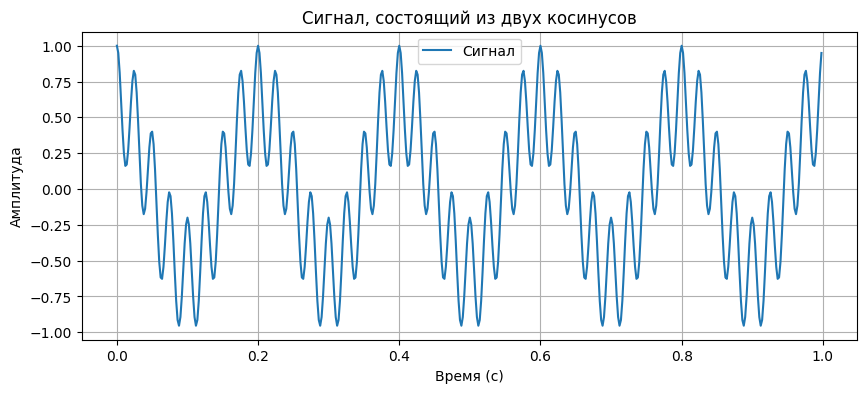

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Параметры времени
T = 1.0         # длительность сигнала в секундах
fs = 500.0      # частота дискретизации (в герцах)
t = np.arange(0, T, 1/fs) # массив времени

# Создание сигнала
f1 = 5.0        # частота первого косинуса
f2 = 40.0       # частота второго косинуса
a1 = 0.6        # амплитуда первого косинуса
a2 = 0.4        # амплитуда второго косинуса
signal = a1*np.cos(2*np.pi*f1*t) + a2*np.cos(2*np.pi*f2*t)

# Визуализация сигнала
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Cигнал, состоящий из двух косинусов')
plt.legend()
plt.grid(True)
plt.show()


### Ваш код:

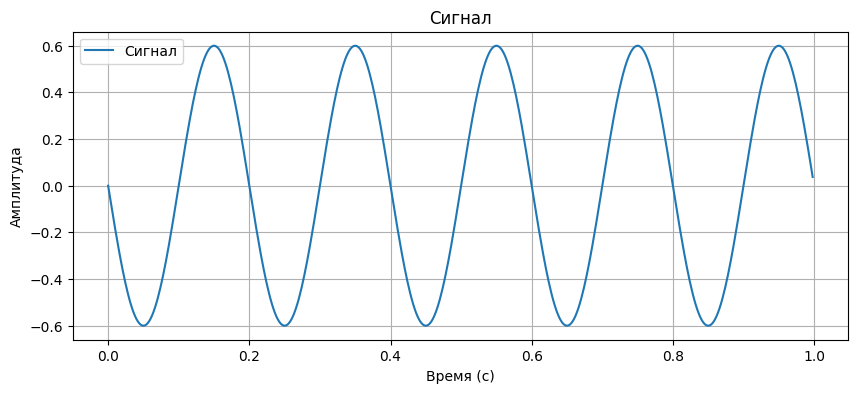

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def generate_signal(T, fs, f, a, fi):
    t = np.arange(0, T, 1/fs)
    signal = a * np.sin(2 * np.pi * f * t + fi)
    return t, signal

T = 1.0
fs = 500.0
f = 5.0
a = 0.6
fi = 1 * np.pi

t_1_sin, signal_1_sin = generate_signal(T, fs, f, a, fi)

# Визуализация сигнала
plt.figure(figsize=(10, 4))
plt.plot(t_1_sin, signal_1_sin, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Cигнал')
plt.legend()
plt.grid(True)
plt.show()

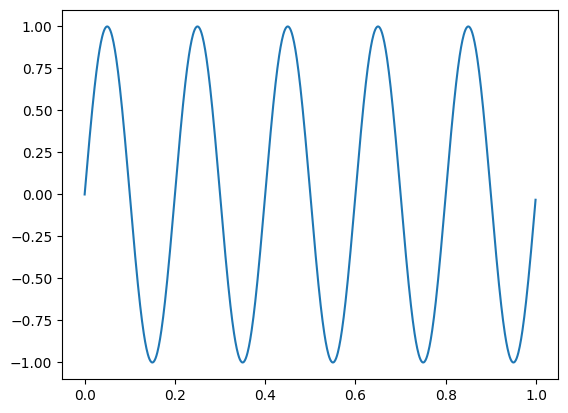

In [ ]:
# Пример

2. **Сумма синусоид**: Сигнал, состоящий из суммы двух синусоид, можно представить как $A_1 \sin(2\pi f_1t + \phi_1) + A_2 \sin(2\pi f_2t + \phi_2)$.

- Создайте функцию, которая принимает параметры для двух синусоид, а также длительность сигнала, и возвращает сгенерированный сигнал.

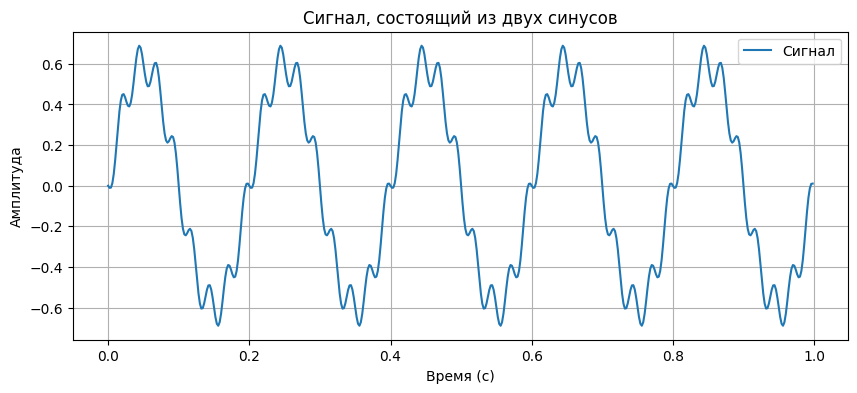

In [ ]:
def generate_signal(T, fs, f1, f2, a1, a2, fi1, fi2):
  t = np.arange(0, T, 1/fs)
  signal = a1*np.sin(2*np.pi*f1*t+fi1) + a2*np.sin(2*np.pi*f2*t+fi2)
  return t, signal

# Параметры времени
T = 1.0         # длительность сигнала в секундах
fs = 500.0      # частота дискретизации (в герцах)
t = np.arange(0, T, 1/fs) # массив времени

# Создание сигнала
f1 = 5.0        # частота первого косинуса
f2 = 40.0       # частота второго косинуса

a1 = 0.6        # амплитуда первого косинуса
a2 = 0.1        # амплитуда второго косинуса

fi1 = 0
fi2 = np.pi

t_2_sin, signal_2_sin = generate_signal(T, fs, f1, f2, a1, a2, fi1, fi2)

# Визуализация сигнала
plt.figure(figsize=(10, 4))
plt.plot(t_2_sin, signal_2_sin, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Cигнал, состоящий из двух синусов')
plt.legend()
plt.grid(True)
plt.show()


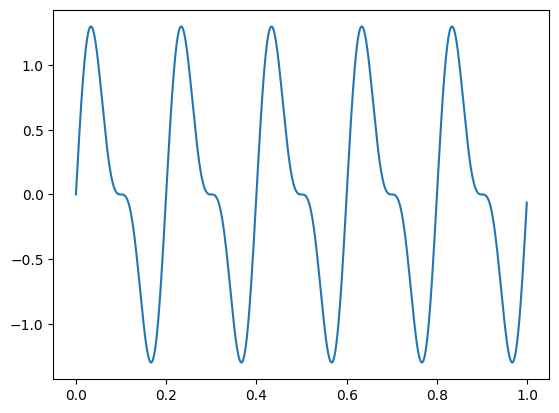

In [ ]:
# Пример

3. **Шумовой сигнал**: Шумовой сигнал (или белый шум) можно сгенерировать как случайные значения из нормального распределения.

- Создайте функцию, которая принимает амплитуду шума и длительность сигнала, и возвращает сгенерированный шумовой сигнал.

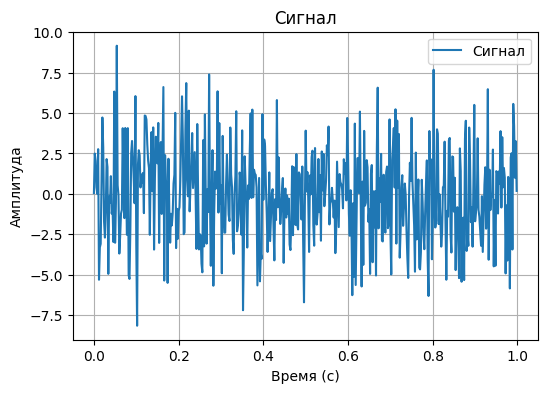

In [ ]:
def generate_noise_signal(amplitude, time, fs, loc=0):
  t = np.arange(0, T, 1/fs)
  noise = np.random.normal(scale=amplitude,size=fs)
  return t, noise

A = 3
T = 1
fs = 500
t_noise, noise = generate_noise_signal(A, T, fs)

# Визуализация сигнала
plt.figure(figsize=(6, 4))
plt.plot(t, noise, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Cигнал')
plt.legend()
plt.grid(True)
plt.show()

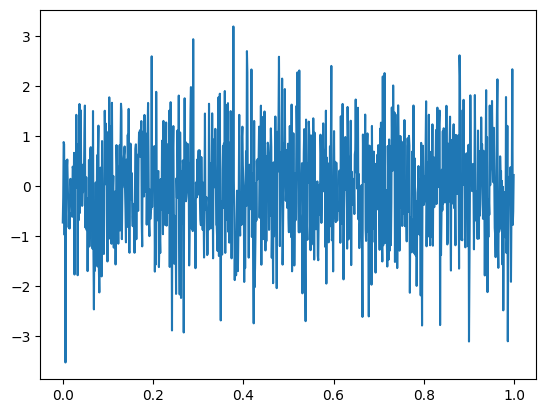

In [ ]:
# Пример

4. **Синусоида плюс шум**: Сигнал, который представляет собой сумму синусоиды и шума, можно сгенерировать путем сложения синусоидального и шумового сигналов.
- Создайте функцию, которая принимает параметры для синусоиды и шума, а также длительность сигнала, и возвращает сгенерированный сигнал.

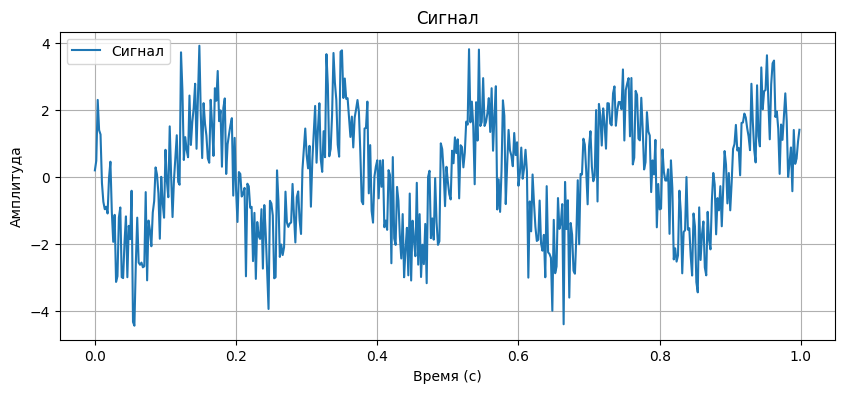

In [ ]:
def generate_signal(T, fs, f, a, fi):
  t = np.arange(0, T, 1/fs)
  signal = a * np.sin(2 * np.pi * f * t + fi)
  return t, signal

def generate_noise_signal(amplitude, time, fs, loc=0):
  t = np.arange(0, T, 1/fs)
  noise = np.random.normal(scale=amplitude,size=fs)
  return t, noise

def noised_signal(signal, noise):
  return signal+noise

T = 1
fs = 500

A = 1
t_noise_ns, noise_ns = generate_noise_signal(A, T, fs)

f = 5.0
a = 2
fi = 1 * np.pi

t_signal_ns, signal_ns = generate_signal(T, fs, f, a, fi)
noised_sin = noised_signal(signal_ns,noise_ns)
# Визуализация сигнала
plt.figure(figsize=(10, 4))
plt.plot(t_noise, noised_sin, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Cигнал')
plt.legend()
plt.grid(True)
plt.show()

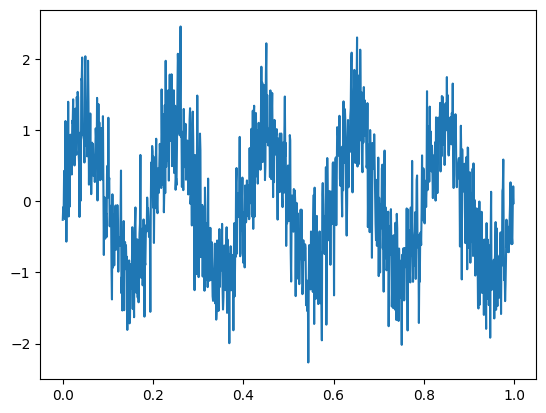

In [ ]:
# Пример

## **Задание 2: Преобразование Фурье**


Преобразование Фурье позволяет перейти от временного представления сигнала к частотному. Это основной инструмент для анализа сигналов. Создайте функцию, которая принимает сигнал и возвращает его преобразование Фурье.


1. Примените преобразование Фурье к синусоидальному сигналу и визуализируйте результат.


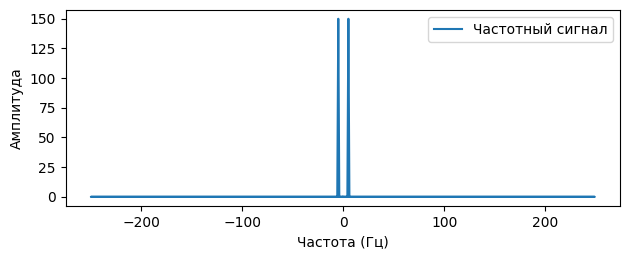

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

def generate_signal(T, fs, f, a, fi):
    t = np.arange(0, T, 1/fs)
    signal = a * np.sin(2 * np.pi * f * t + fi)
    return t, signal

T = 1.0
fs = 500.0
f = 5.0
a = 0.6
fi = 1 * np.pi

t, signal = generate_signal(T, fs, f, a, fi)

signal_fft = fft(signal)

plt.subplot(2, 1, 2)
freq = np.fft.fftfreq(len(signal), 1/fs)
plt.plot(freq, np.abs(signal_fft), label='Частотный сигнал')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.legend()

plt.tight_layout()
plt.show()

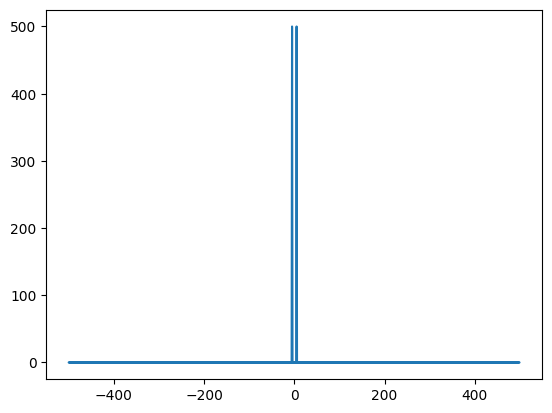

In [ ]:
# Пример

2. Примените преобразование Фурье к сигналу, состоящему из суммы двух синусоид, и визуализируйте результат.


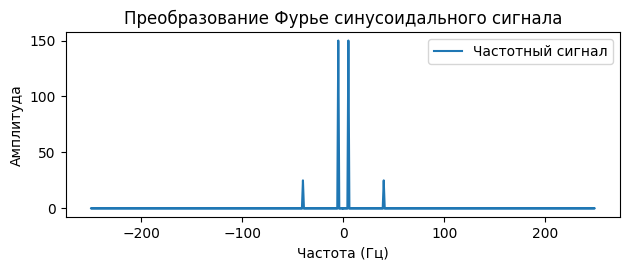

In [ ]:
def generate_signal(T, fs, f1, f2, a1, a2, fi1, fi2):
  t = np.arange(0, T, 1/fs)
  signal = a1*np.sin(2*np.pi*f1*t+fi1) + a2*np.sin(2*np.pi*f2*t+fi2)
  return t, signal

# Параметры времени
T = 1.0         # длительность сигнала в секундах
fs = 500.0      # частота дискретизации (в герцах)
t = np.arange(0, T, 1/fs) # массив времени

# Создание сигнала
f1 = 5.0        # частота первого косинуса
f2 = 40.0       # частота второго косинуса

a1 = 0.6        # амплитуда первого косинуса
a2 = 0.1        # амплитуда второго косинуса

fi1 = 0
fi2 = np.pi

t, signal = generate_signal(T, fs, f1, f2, a1, a2, fi1, fi2)

signal_fft = fft(signal)

plt.subplot(2, 1, 2)
freq = np.fft.fftfreq(len(signal), 1/fs)
plt.plot(freq, np.abs(signal_fft), label='Частотный сигнал')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Преобразование Фурье синусоидального сигнала')
plt.legend()

plt.tight_layout()
plt.show()

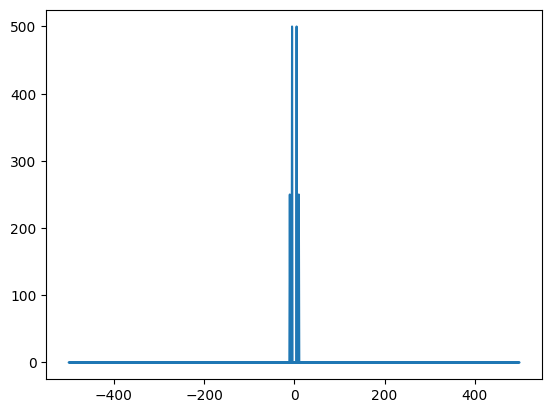

In [ ]:
# Пример

3. Примените преобразование Фурье к шумовому сигналу и визуализируйте результат.


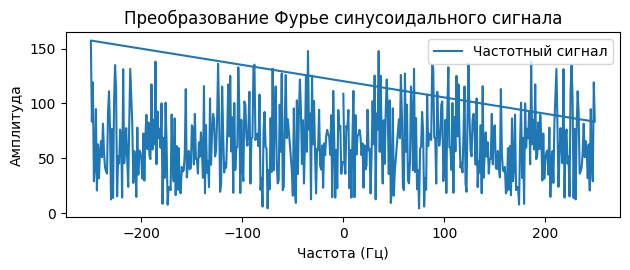

In [ ]:
def generate_noise_signal(amplitude, time, fs, loc=0):
  t = np.arange(0, T, 1/fs)
  noise = np.random.normal(scale=amplitude,size=fs)
  return t, noise

A = 3
T = 1
fs = 500
t, signal = generate_noise_signal(A, T, fs)

signal_fft = fft(signal)

plt.subplot(2, 1, 2)
freq = np.fft.fftfreq(len(signal), 1/fs)
plt.plot(freq, np.abs(signal_fft), label='Частотный сигнал')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Преобразование Фурье синусоидального сигнала')
plt.legend()

plt.tight_layout()
plt.show()

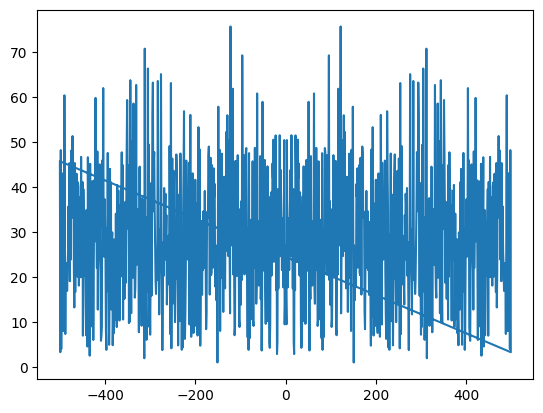

In [ ]:
# Пример

4. Примените преобразование Фурье к сигналу, который представляет собой сумму синусоиды и шума, и визуализируйте результат.

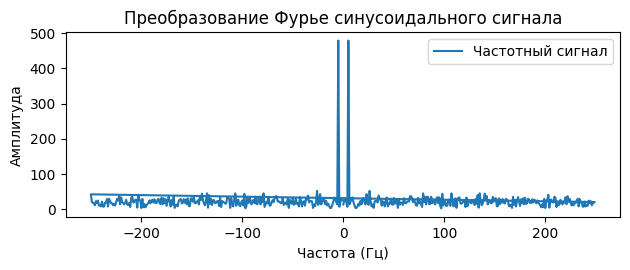

In [ ]:
def generate_signal(T, fs, f, a, fi):
  t = np.arange(0, T, 1/fs)
  signal = a * np.sin(2 * np.pi * f * t + fi)
  return t, signal

def generate_noise_signal(amplitude, time, fs, loc=0):
  t = np.arange(0, T, 1/fs)
  noise = np.random.normal(scale=amplitude,size=fs)
  return t, noise

def noised_signal(signal, noise):
  return signal+noise

T = 1
fs = 500

A = 1
t_noise, noise = generate_noise_signal(A, T, fs)

f = 5.0
a = 2
fi = 1 * np.pi

t_signal, signal = generate_signal(T, fs, f, a, fi)
noised_sin = noised_signal(signal,noise)

signal_fft = fft(noised_sin)

plt.subplot(2, 1, 2)
freq = np.fft.fftfreq(len(signal), 1/fs)
plt.plot(freq, np.abs(signal_fft), label='Частотный сигнал')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Преобразование Фурье синусоидального сигнала')
plt.legend()

plt.tight_layout()
plt.show()


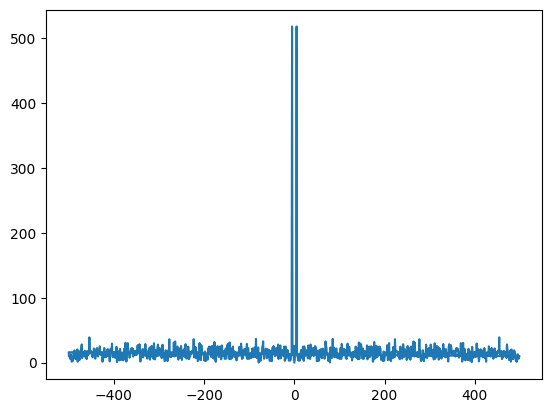

In [ ]:
# Пример

## **Задание 3: Фильтрация сигналов**

Фильтрация сигналов позволяет улучшить качество сигнала, убрав нежелательные частоты. Создайте функцию, которая принимает сигнал и частоту среза, и возвращает отфильтрованный сигнал.




1. Создайте функцию для фильтрации сигнала с использованием преобразования Фурье.

In [ ]:
def apply_fft_filter(signal, fs, cutoff_freq):
    n = len(signal)
    signal_fft = fft(signal)
    freq = np.fft.fftfreq(n, 1/fs)

    filter_freq = np.abs(freq) <= cutoff_freq
    filtered_signal_fft = signal_fft * filter_freq

    filtered_signal = np.real(ifft(filtered_signal_fft))

    return filtered_signal


In [ ]:
# Пример

2. Примените эту функцию к сигналу, который представляет собой сумму синусоиды и шума, и визуализируйте результаты до и после фильтрации.

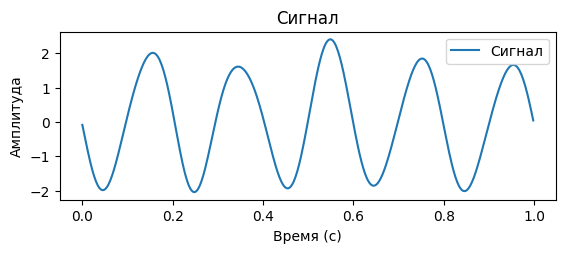

In [ ]:
filtred_signal = apply_fft_filter(noised_sin, fs, cutoff_freq=10)

plt.subplot(2, 1, 2)
plt.plot(t_noise, filtred_signal, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал')
plt.legend()
plt.show()

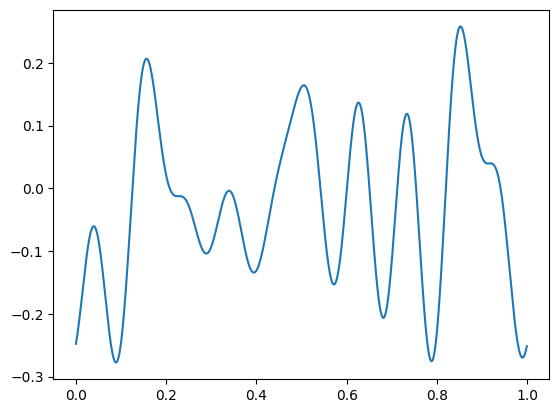

In [ ]:
# Пример

## **Задание 4: Анализ сигналов**

Анализ сигналов включает в себя различные методы и техники для изучения и понимания сигналов. Создайте функцию, которая принимает сигнал и возвращает его спектрограмму (**scipy.signal.spectrogram**).


**Спектрограмма** - это визуальное представление спектра частот сигнала во времени. Она показывает, какие частоты присутствуют в сигнале в каждый момент времени. Вот как правильно понимать спектрограмму:

- **Ось X**: Это время. Она показывает продолжительность сигнала. Каждый столбец на спектрограмме представляет собой отдельный момент времени.

- **Ось Y**: Это частота. Она показывает различные частоты, которые присутствуют в сигнале. Каждая строка на спектрограмме представляет собой отдельную частоту.

- **Значение**: Значение в каждой точке (x, y) показывает амплитуду (или интенсивность) данной частоты в данное время. Обычно более яркие цвета означают большую амплитуду, а более темные цвета - меньшую амплитуду.

Таким образом, спектрограмма позволяет вам видеть, как меняется спектральный состав сигнала во времени. Это может быть полезно во многих областях, включая анализ речи, музыку, радиосигналы и многое другое. Например, в анализе речи вы можете видеть, как меняются форманты (основные частоты) во время произношения различных звуков. В музыке вы можете видеть, как меняются ноты во время проигрывания песни.

1. Создайте функцию для вычисления и визуализации спектрограммы сигнала.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


def plot_spectrogram(signal_o, fs, window='hann', nperseg=256, noverlap=128):
    # Вычислить спектрограмму
    f, t, Sxx = signal.spectrogram(signal_o, fs, window=window, nperseg=nperseg, noverlap=noverlap)

    # Визуализировать спектрограмму
    plt.figure(figsize=(10, 5))
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.xlabel('Время (с)')
    plt.ylabel('Частота (Гц)')
    plt.title('Спектрограмма')
    plt.colorbar()
    plt.show()

    return f, t, Sxx

2. Примените эту функцию к различным сигналам, которые вы сгенерировали и проанализировали в предыдущих заданиях.

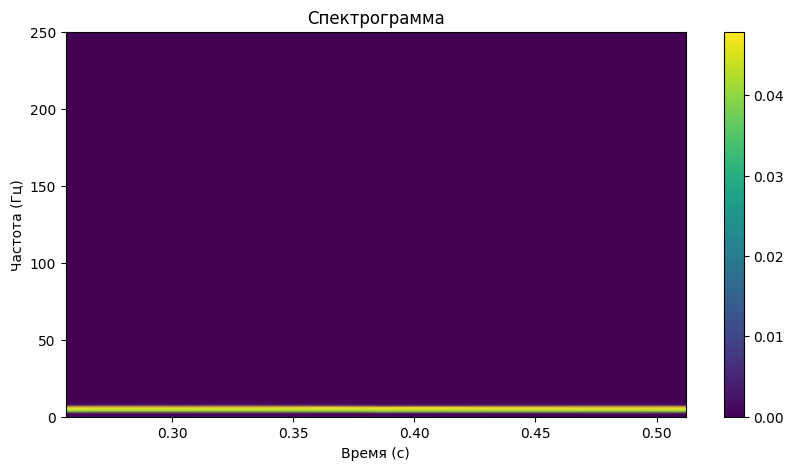

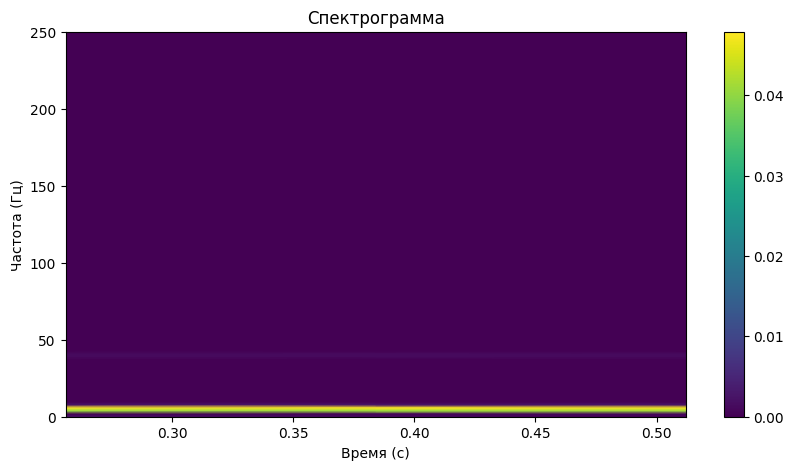

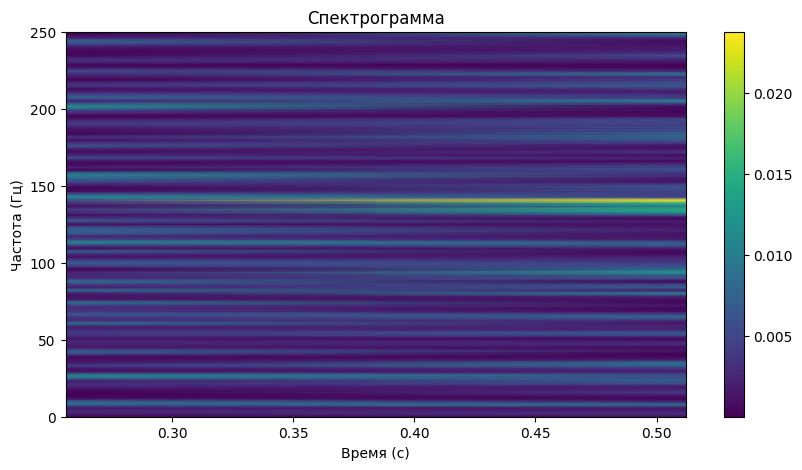

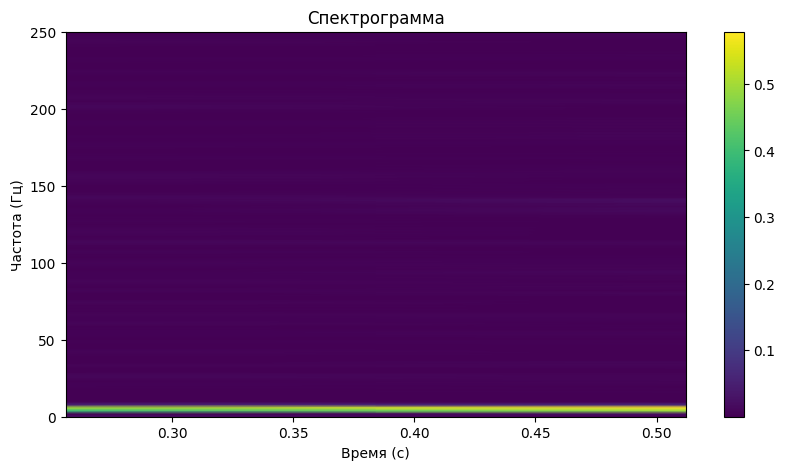

In [ ]:

plot_spectrogram(signal_1_sin, fs)
plot_spectrogram(signal_2_sin, fs)
plot_spectrogram(noise, fs)
plot_spectrogram(noised_sin, fs)
print()

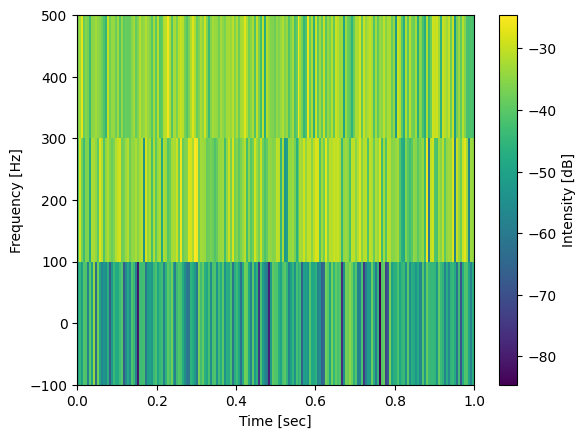

In [ ]:
# Пример

# Блок №2. Повышенный уровень

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.io import wavfile

## **Задание 1: Чтение и визуализация звукового файла**











В этом задании вам нужно использовать функцию `wavfile.read` из модуля `scipy.io` для чтения звукового файла. Эта функция возвращает частоту дискретизации и данные аудиосигнала. Затем вы должны визуализировать эти данные с помощью `matplotlib.pyplot.plot`. В результате вы получите график амплитуды звукового сигнала во времени.

1. Используйте библиотеку `scipy.io.wavfile` для чтения звукового файла.

In [ ]:
sample_rate, data = wavfile.read('/content/jana-silan-melom.wav')

2. Визуализируйте временную форму звукового сигнала.

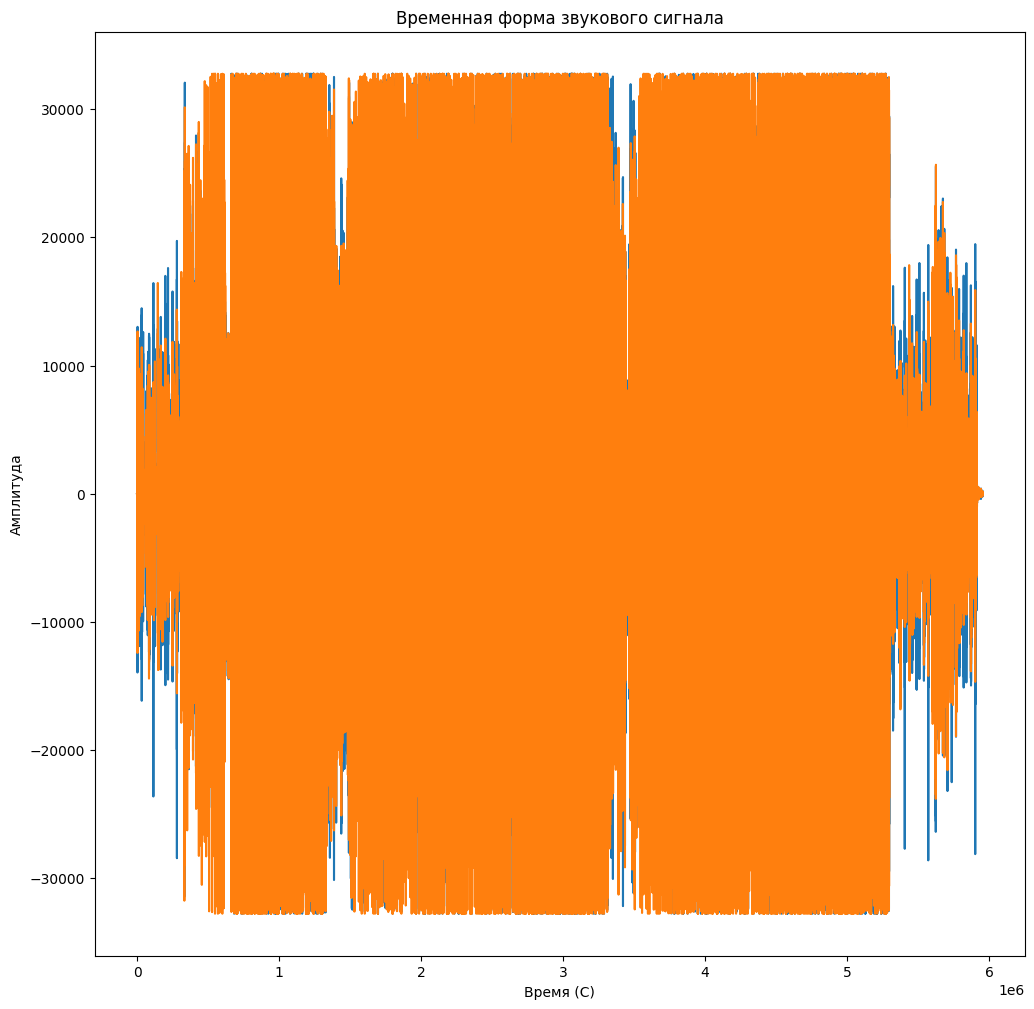

In [ ]:
plt.figure(figsize=(12, 12))
plt.plot(data)
plt.xlabel('Время (C)')
plt.ylabel('Амплитуда')
plt.title('Временная форма звукового сигнала')
plt.show()

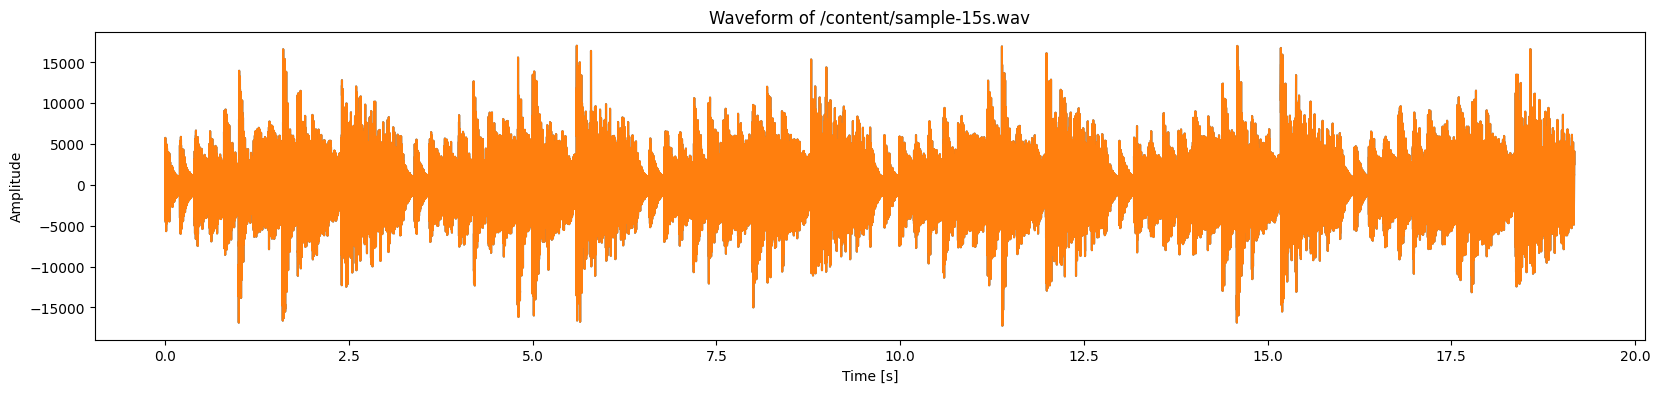

In [ ]:
# Пример

## **Задание 2: Применение преобразования Фурье**



Преобразование Фурье позволяет перейти от временного представления сигнала к частотному. Для его применения вы можете использовать функцию `fft` из модуля `scipy.fft`. Эта функция возвращает комплексные коэффициенты преобразования Фурье, которые затем можно визуализировать.

1. Примените преобразование Фурье к звуковому сигналу и визуализируйте спектр.

<ipython-input-4-da3b2fe47ca0>:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


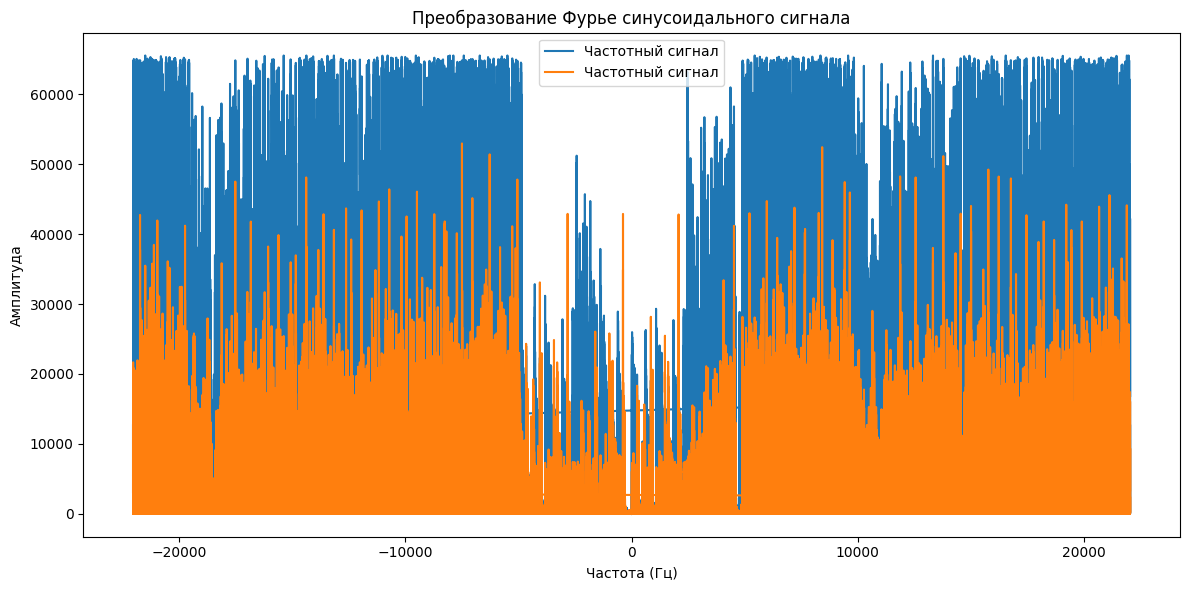

In [ ]:
signal_fft = fft(data)

plt.figure(figsize=(12, 6))
freq = np.fft.fftfreq(len(data), 1/sample_rate)
plt.plot(freq, np.abs(signal_fft), label='Частотный сигнал')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Преобразование Фурье синусоидального сигнала')
plt.legend()

plt.tight_layout()
plt.show()

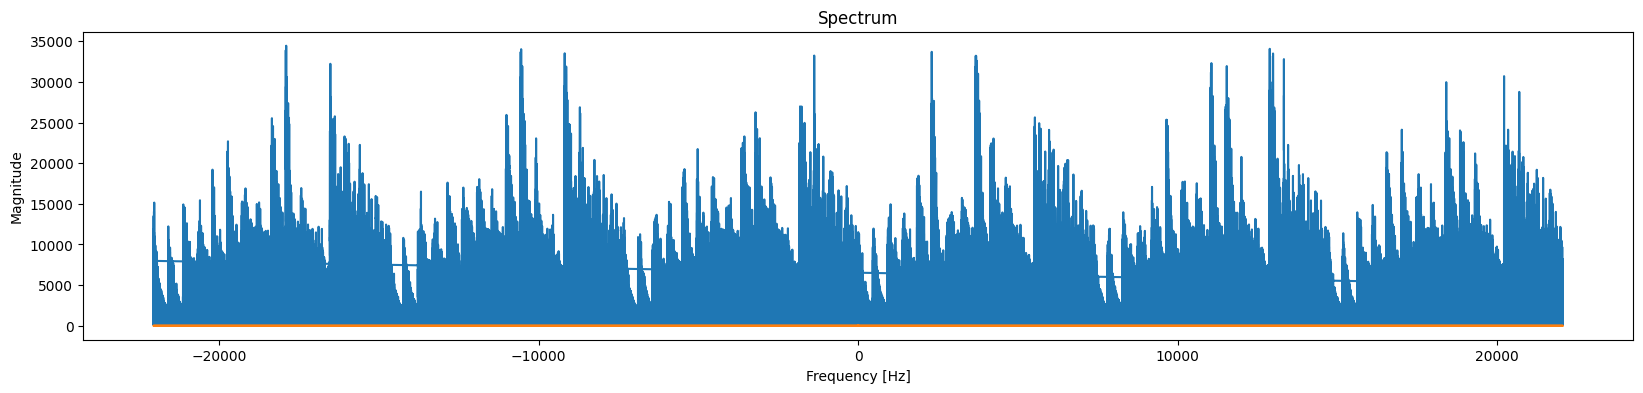

In [ ]:
# Пример

## **Задание 3: Фильтрация сигнала**



Фильтрация сигнала позволяет улучшить качество звука, убрав нежелательные частоты. Для этого вы можете использовать преобразование Фурье, затем обнулить некоторые из его коэффициентов и выполнить обратное преобразование Фурье с помощью функции `ifft` из модуля `scipy.fft`.

1. Создайте функцию для фильтрации сигнала с использованием преобразования Фурье.


In [ ]:
from scipy.fftpack import rfft, irfft, fftfreq
def apply_fft_filter(input_signal, cutoff_freq):
    W = fftfreq(input_signal.size, d=time[1]-time[0])
    f_signal = rfft(input_signal)

    cut_f_signal = f_signal.copy()
    cut_f_signal[(W<cutoff_freq)] = 0

    cut_signal = irfft(cut_f_signal)
    return cut_signal

2. Примените эту функцию к звуковому сигналу и визуализируйте результаты до и после фильтрации.

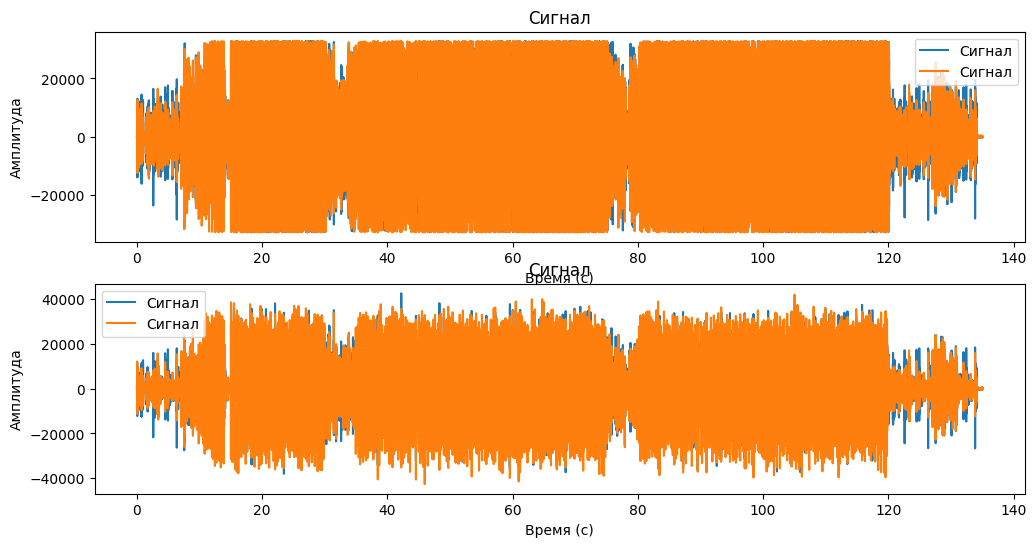

In [ ]:
time   = np.arange(len(data)) / sample_rate


filtred_signal1 = apply_fft_filter(data[:,0], cutoff_freq=1000)
filtred_signal2 = apply_fft_filter(data[:,1], cutoff_freq=1000)
combined_filtred_signals = np.column_stack((filtred_signal1, filtred_signal2))

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, data, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, combined_filtred_signals, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал')
plt.legend()
plt.show()

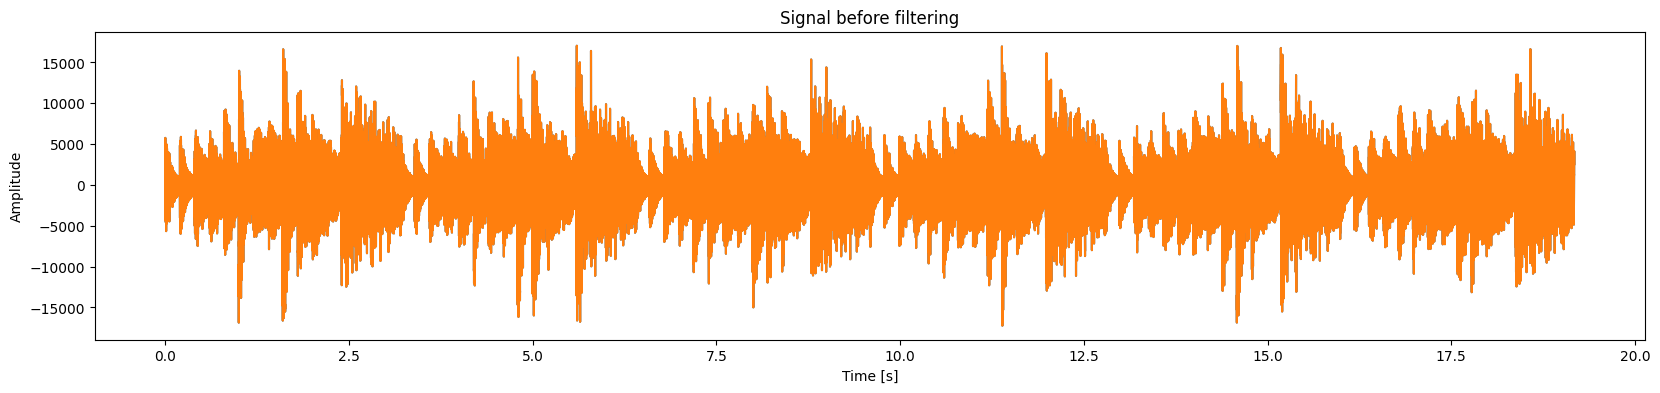

In [ ]:
# Визуализация сигнала до фильтрации

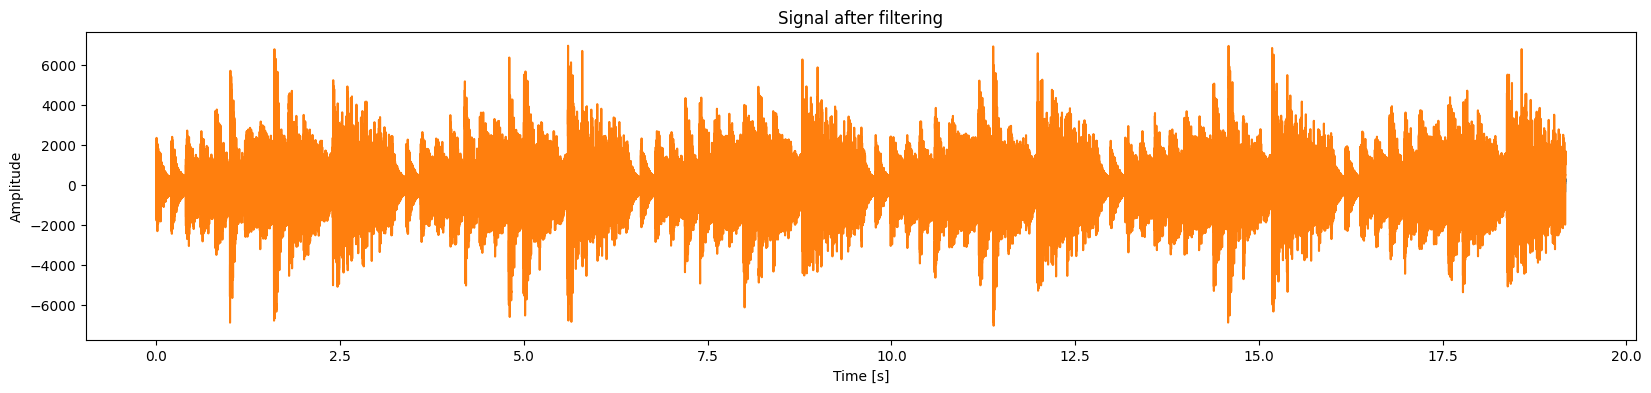

In [ ]:
# Визуализация сигнала после фильтрации

## **Задание 4: Обратное преобразование Фурье**



После фильтрации сигнала вы можете применить обратное преобразование Фурье для получения отфильтрованного звукового сигнала во временной области. Затем вы можете сохранить этот сигнал в новый звуковой файл с помощью функции `wavfile.write` из модуля `scipy.io`.

1. Примените обратное преобразование Фурье к отфильтрованному сигналу.


In [ ]:
from scipy.fft import rfft, irfft

def apply_fft_filter(input_signal, cutoff_freq, sample_rate):
    f_signal = rfft(input_signal)
    W = np.fft.rfftfreq(input_signal.size, d=1/sample_rate)
    f_signal[np.abs(W) > cutoff_freq] = 0
    filtered_signal = irfft(f_signal)
    return filtered_signal

filtered_signal1 = apply_fft_filter(data[:, 0], cutoff_freq=1000, sample_rate=sample_rate)
filtered_signal2 = apply_fft_filter(data[:, 1], cutoff_freq=1000, sample_rate=sample_rate)
combined_filtered_signals = np.column_stack((filtered_signal1, filtered_signal2))


2. Сохраните полученный сигнал в новый звуковой файл.

In [ ]:
output_file_path = '/content/filtered_signal.wav'
wavfile.write(output_file_path, sample_rate, combined_filtered_signals.astype(np.int16))